In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\\1990-2023.csv')

In [3]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a DataFrame called 'df' with a column named 'Variable_of_Interest'
# Perform the Augmented Dickey-Fuller Test
result = adfuller(df['Precipitation Total sfc mm sum'])

# Print the test statistics and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
    print('Reject the null hypothesis. Data is stationary.')
else:
    print('Fail to reject the null hypothesis. Data is non-stationary.')

ADF Statistic: -12.008190196260072
p-value: 3.2268266234286646e-22
Reject the null hypothesis. Data is stationary.


Since the p-value (3.2268266234286646e-22) is significantly less than the common significance level of 0.05, we can reject the null hypothesis.
The null hypothesis of the ADF test is that the time series data is non-stationary.
Rejecting the null hypothesis means that we have sufficient evidence to conclude that the data is stationary.
Therefore, in this case, the result "Data is stationary" means that the mean, variance, and autocovariance of the time series data remain constant over time, indicating stationarity.

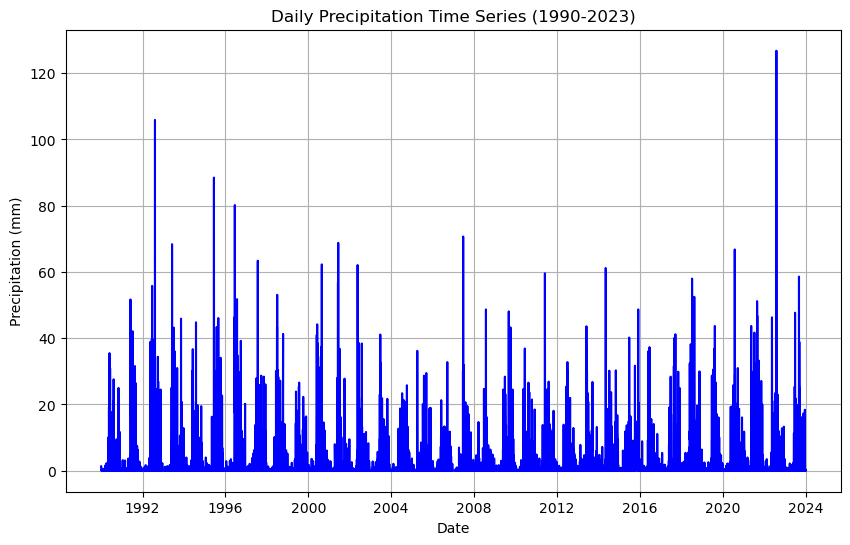

ADF Statistic: -12.008190196260072
p-value: 3.2268266234286646e-22
The series is likely stationary.


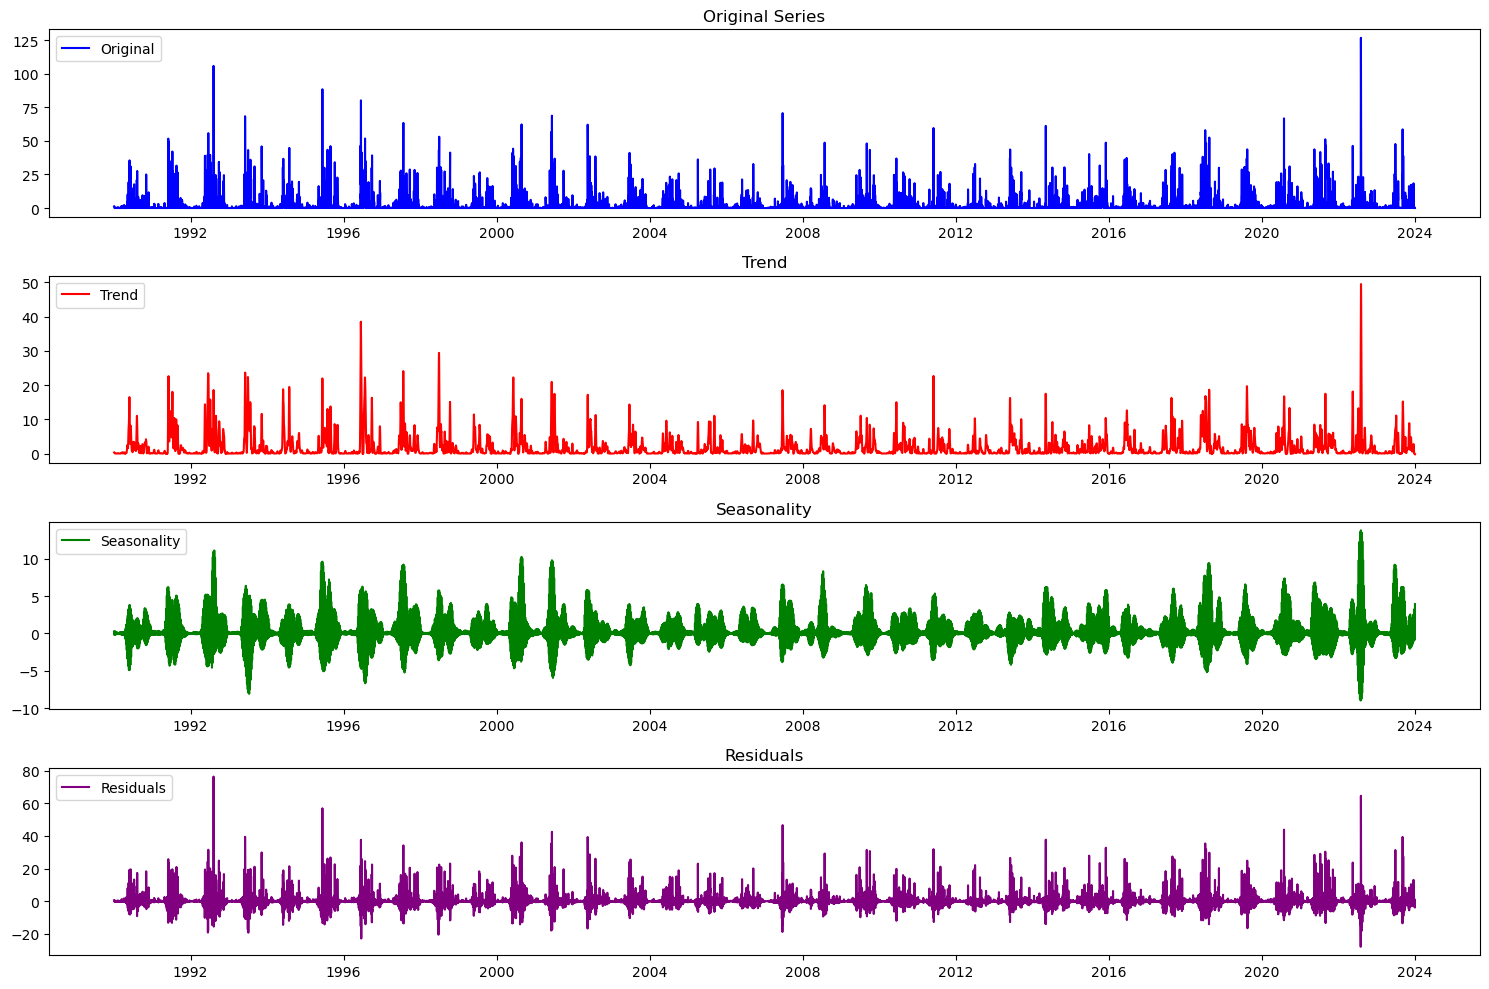

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'precipitation_data.csv' with columns 'Date' and 'Precipitation Total sfc mm su

# Convert 'Date' column to datetime format and set as index
# Convert 'Time' column to datetime format with the correct format string
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')

# Set the 'Time' column as the index
df.set_index('Time', inplace=True)


# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Precipitation Total sfc mm sum'], color='blue')
plt.title('Daily Precipitation Time Series (1990-2023)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

# Stationarity check using ADF test
result = adfuller(df['Precipitation Total sfc mm sum'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print('The series is likely non-stationary.')
else:
    print('The series is likely stationary.')

# Decomposition to analyze trend and seasonality
decomposition = STL(df['Precipitation Total sfc mm sum'], seasonal=13).fit()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components of decomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(df.index, df['Precipitation Total sfc mm sum'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Series')
plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend')
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonality')
plt.subplot(414)
plt.plot(df.index, residual, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.title('Residuals')
plt.tight_layout()
plt.show()


Precipitation Total: High levels of precipitation, especially over short durations, can lead to rapid runoff and contribute to flash flooding.

Relative Humidity: High relative humidity indicates moisture in the air, which can contribute to the intensity of rainfall events, potentially leading to flash floods.

Soil Moisture: Elevated soil moisture levels suggest that the ground may already be saturated, reducing its ability to absorb additional rainfall and increasing the likelihood of runoff and flash flooding.

Evapotranspiration: Evapotranspiration affects soil moisture levels and can indirectly influence flash flood potential by altering the soil's capacity to absorb water.

Cloud Cover: Cloud cover can impact incoming solar radiation, affecting surface temperatures and potentially influencing precipitation patterns and flash flood risk.

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


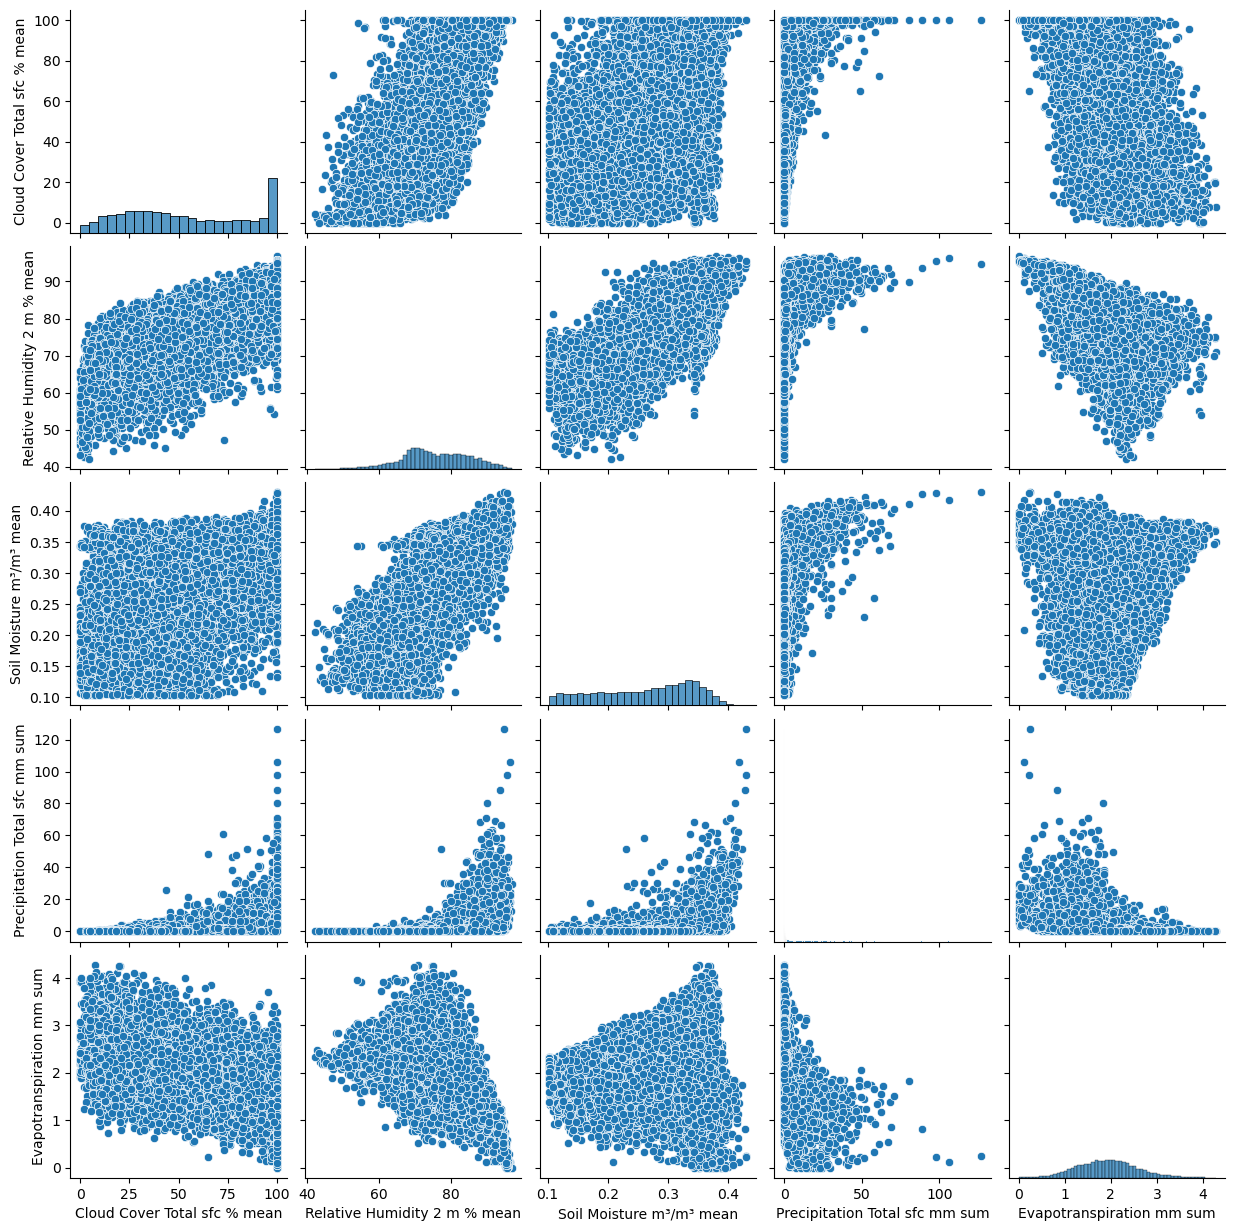

In [5]:
# Extract the relevant columns
variables = ['Cloud Cover Total sfc % mean', 
             'Relative Humidity 2 m % mean', 
             'Soil Moisture m³/m³ mean', 
             'Precipitation Total sfc mm sum', 
             'Evapotranspiration mm sum']
df = df[variables]

# Set the index to the 'Time' column if it's not already the index
# df['Time'] = pd.to_datetime(df['Time'])
# df.set_index('Time', inplace=True)

# Plot the data
sns.pairplot(df)
plt.show()


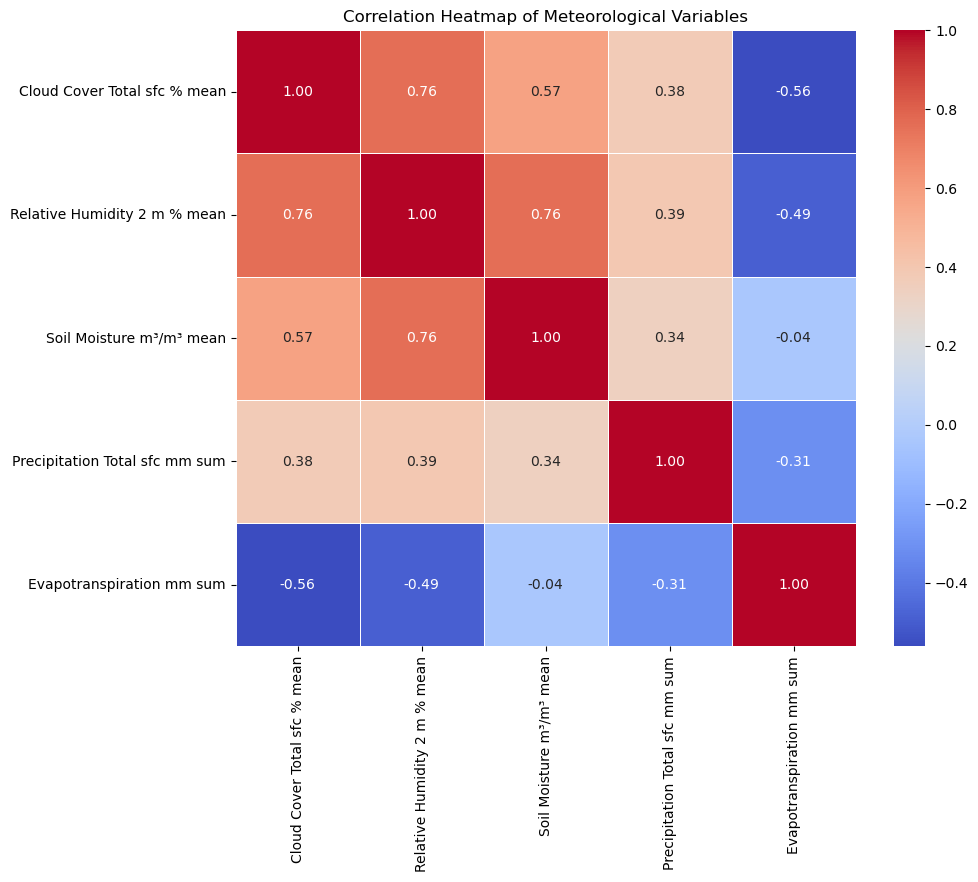

In [6]:
# Extract the relevant columns
variables = ['Cloud Cover Total sfc % mean', 
             'Relative Humidity 2 m % mean', 
             'Soil Moisture m³/m³ mean', 
             'Precipitation Total sfc mm sum', 
             'Evapotranspiration mm sum']
df = df[variables]

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Meteorological Variables')
plt.show()

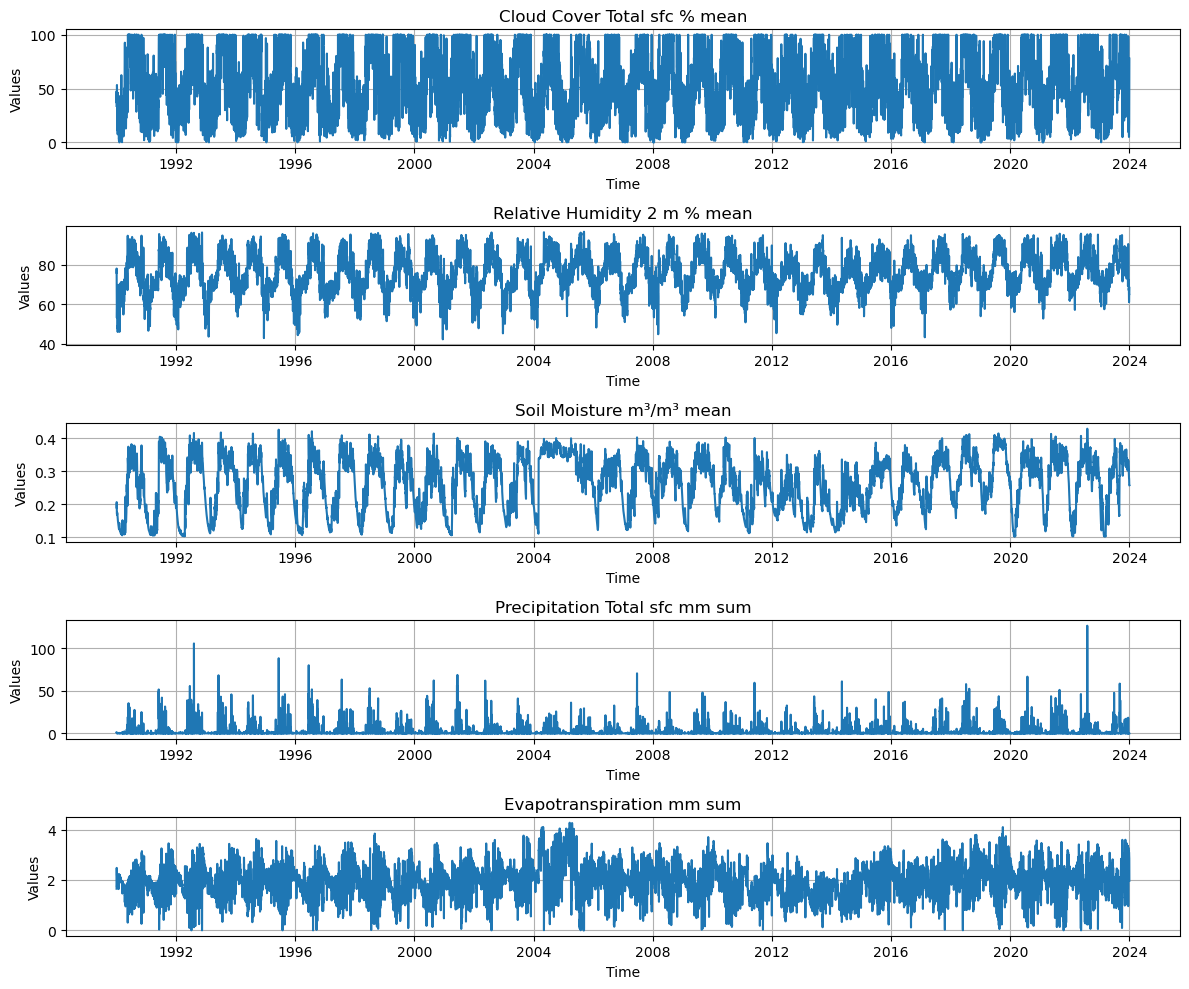

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'data.csv'
df = pd.read_csv('D:\\1990-2023.csv')

df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')

# Extract the relevant columns
variables = ['Cloud Cover Total sfc % mean', 
             'Relative Humidity 2 m % mean', 
             'Soil Moisture m³/m³ mean', 
             'Precipitation Total sfc mm sum', 
             'Evapotranspiration mm sum']

# Plot each variable in a separate subplot
plt.figure(figsize=(12, 10))

for i, variable in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    plt.plot(df['Time'], df[variable])
    plt.title(variable)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# Calculate the rolling 5-day cumulative rainfall
df['5-day Cumulative Rainfall'] = df['Precipitation Total sfc mm sum'].rolling(window=5, min_periods=1).sum()

# Define the threshold for flash flood classification (e.g., 100 mm)
threshold = 100

# Create a new column for flash flood classification
df['Flash Flood'] = df['5-day Cumulative Rainfall'] >= threshold

# Convert boolean values to integers (0 for False, 1 for True)
df['Flash Flood'] = df['Flash Flood'].astype(int)

# Print the dataframe with the new classification column
print(df['Flash Flood'])

0        0
1        0
2        0
3        0
4        0
        ..
12413    0
12414    0
12415    0
12416    0
12417    0
Name: Flash Flood, Length: 12418, dtype: int32


In [9]:
# Filter the dataframe to include only days when flash floods occurred
flash_flood_days = df[(df['Flash Flood'] == 1) & (df['Time'].dt.year.isin([2018, 2019, 2020, 2022]))]

# Print the days when flash floods occurred specifically for the years 2018, 2019, 2020, and 2022
print("Days when flash floods occurred specifically for the years 2018, 2019, 2020, and 2022:")
print(flash_flood_days['Time'])

Days when flash floods occurred specifically for the years 2018, 2019, 2020, and 2022:
10418   2018-07-11
10419   2018-07-12
10454   2018-08-16
10455   2018-08-17
10456   2018-08-18
10457   2018-08-19
10815   2019-08-12
10816   2019-08-13
11171   2020-08-02
11824   2022-05-17
11825   2022-05-18
11826   2022-05-19
11901   2022-08-02
11902   2022-08-03
11903   2022-08-04
11904   2022-08-05
11905   2022-08-06
11906   2022-08-07
Name: Time, dtype: datetime64[ns]


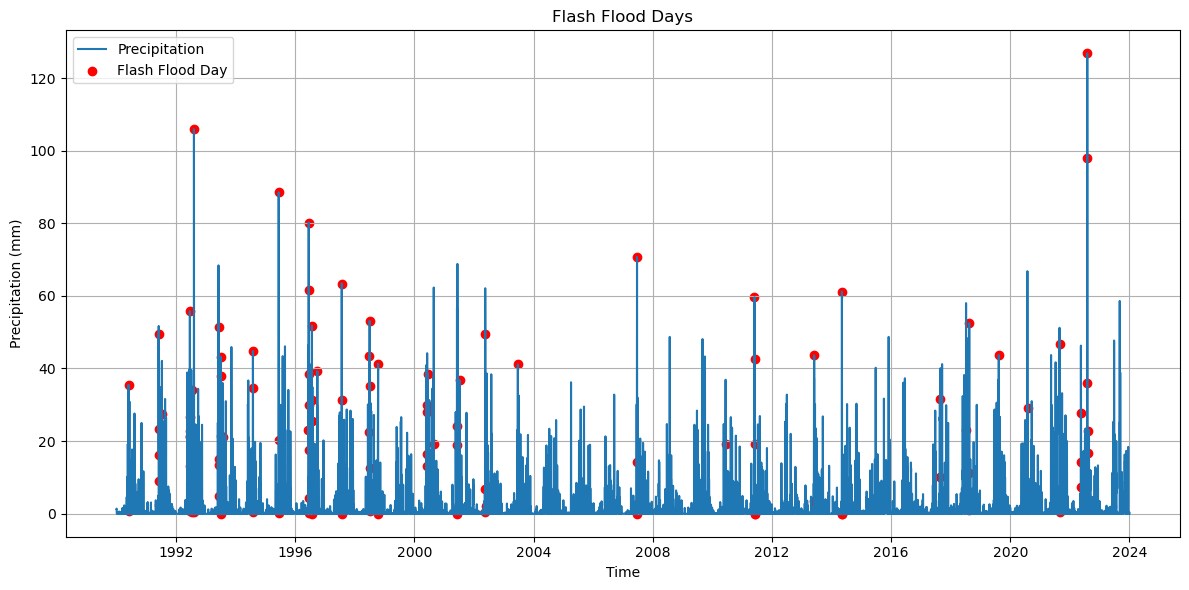

In [10]:
# Filter the dataframe to include only days where flash flood occurred
flash_flood_days = df[df['Flash Flood'] == 1]

# Plot the flash flood days
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Precipitation Total sfc mm sum'], label='Precipitation')
plt.scatter(flash_flood_days['Time'], flash_flood_days['Precipitation Total sfc mm sum'], color='red', label='Flash Flood Day')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Flash Flood Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

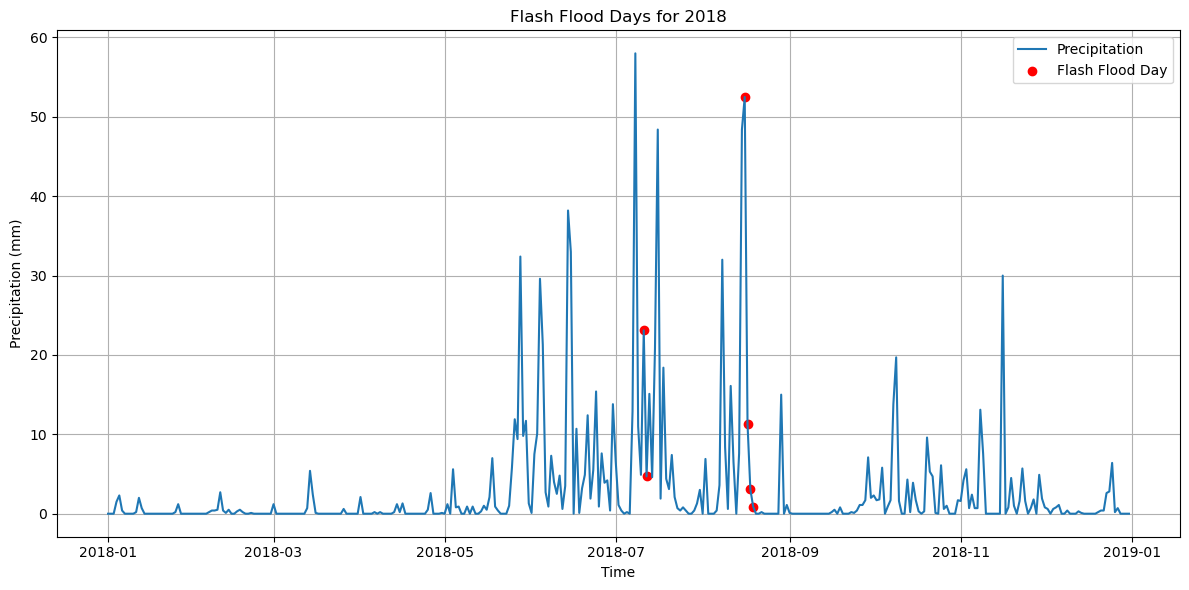

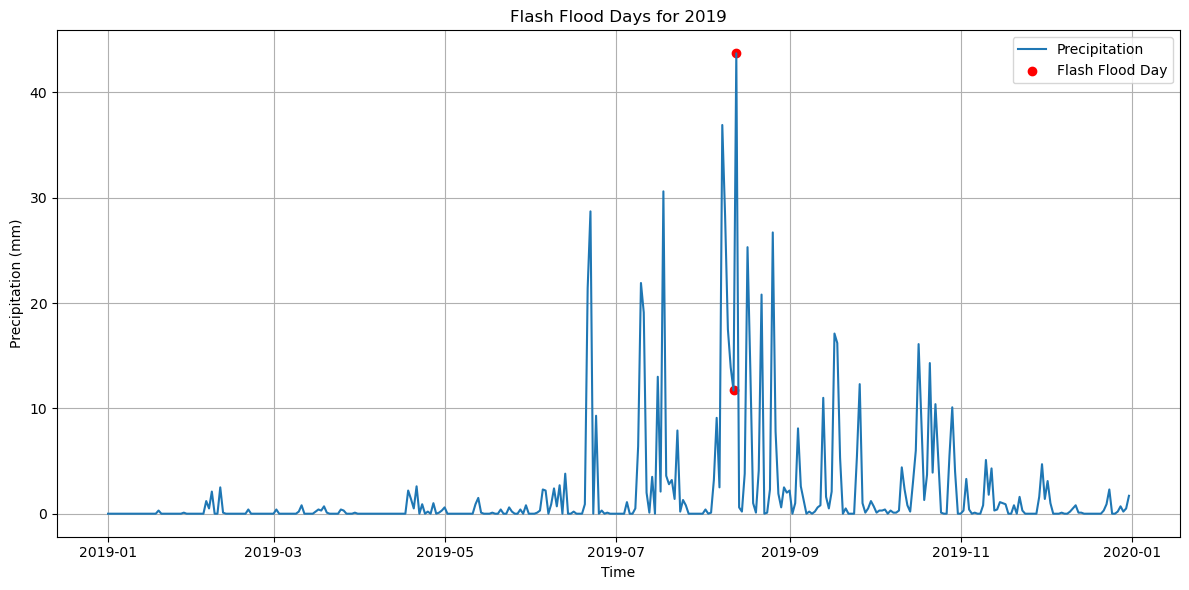

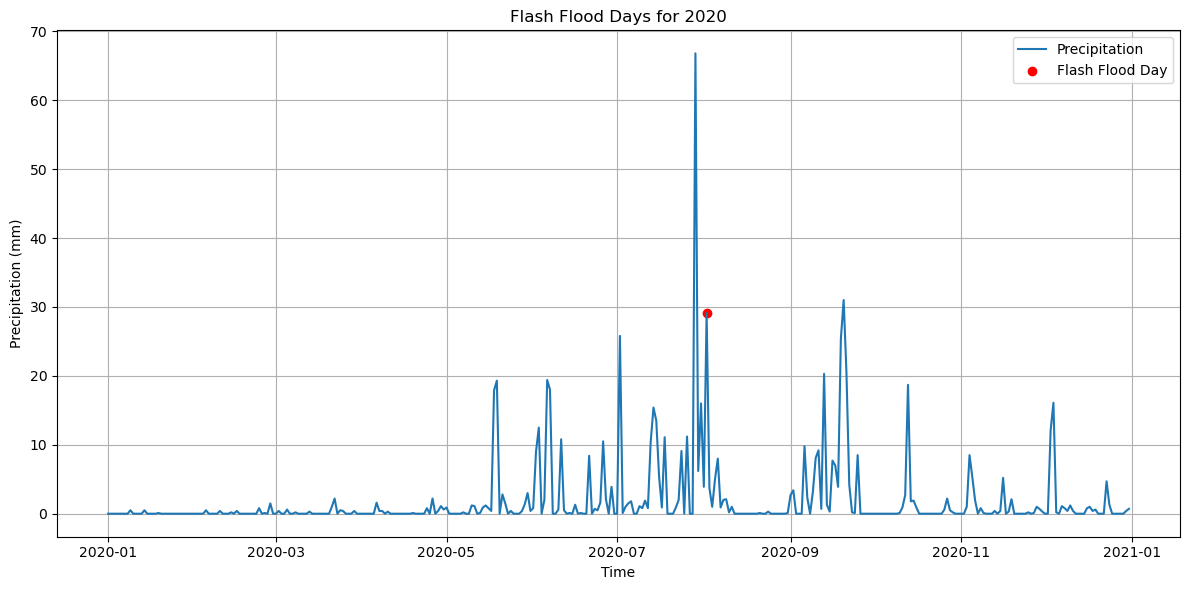

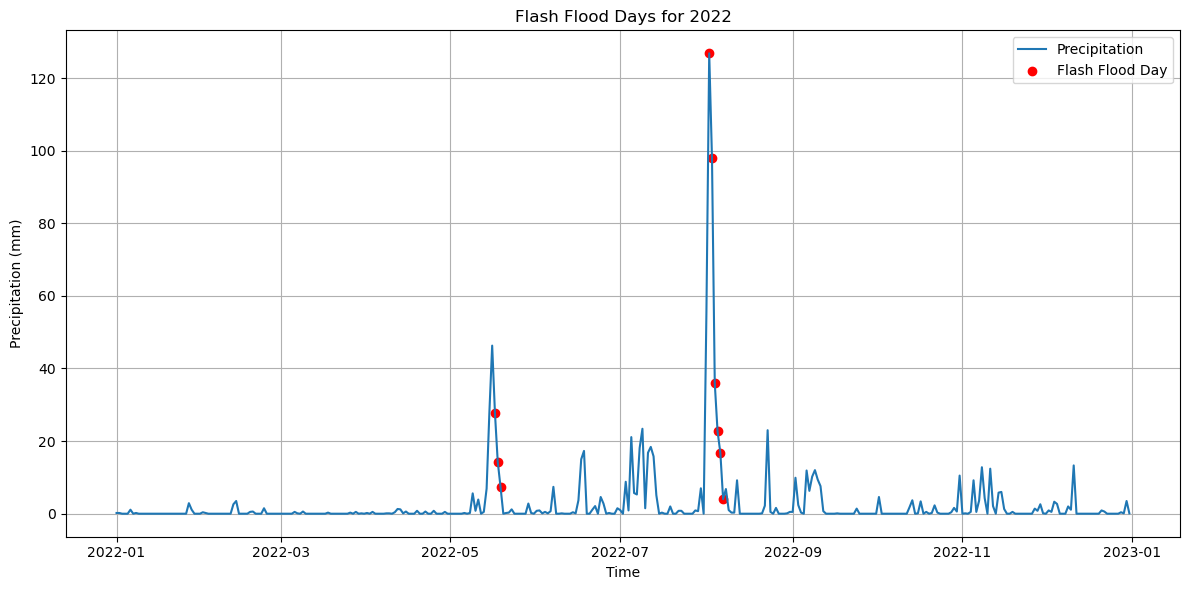

In [11]:
# Filter the dataframe for each specific year
years = [2018, 2019, 2020, 2022]

for year in years:
    # Filter the dataframe for the specific year
    df_year = df[df['Time'].dt.year == year]
    
    # Filter the dataframe to include only days where flash flood occurred
    flash_flood_days = df_year[df_year['Flash Flood'] == 1]
    
    # Plot the flash flood days for the specific year
    plt.figure(figsize=(12, 6))
    plt.plot(df_year['Time'], df_year['Precipitation Total sfc mm sum'], label='Precipitation')
    plt.scatter(flash_flood_days['Time'], flash_flood_days['Precipitation Total sfc mm sum'], color='red', label='Flash Flood Day')
    plt.xlabel('Time')
    plt.ylabel('Precipitation (mm)')
    plt.title(f'Flash Flood Days for {year}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
import pandas as pd

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'data.csv'
df = pd.read_csv('D:\\1990-2023.csv')

# Assuming 'Time' is the column containing the timestamps
# Parse the 'Time' column with the specified date format
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')

# Calculate the rolling 5-day cumulative rainfall
df['5-day Cumulative Rainfall'] = df['Precipitation Total sfc mm sum'].rolling(window=5, min_periods=1).sum()

# Define thresholds for rainfall categories (mm)
yellow_threshold = 25
orange_threshold = 65
red_threshold = 110

# Create a new column for rainfall category
df['Rainfall Category'] = pd.cut(df['5-day Cumulative Rainfall'], 
                                 bins=[-float('inf'), yellow_threshold, orange_threshold, red_threshold, float('inf')],
                                 labels=['Green', 'Yellow', 'Orange', 'Red'])

# Print the dataframe with the new rainfall category column
print(df[['Time', '5-day Cumulative Rainfall', 'Rainfall Category']])


            Time  5-day Cumulative Rainfall Rainfall Category
0     1990-01-01                        1.3             Green
1     1990-01-02                        2.7             Green
2     1990-01-03                        2.7             Green
3     1990-01-04                        2.7             Green
4     1990-01-05                        2.7             Green
...          ...                        ...               ...
12413 2023-12-27                        0.3             Green
12414 2023-12-28                        0.0             Green
12415 2023-12-29                        0.1             Green
12416 2023-12-30                        0.5             Green
12417 2023-12-31                        0.5             Green

[12418 rows x 3 columns]


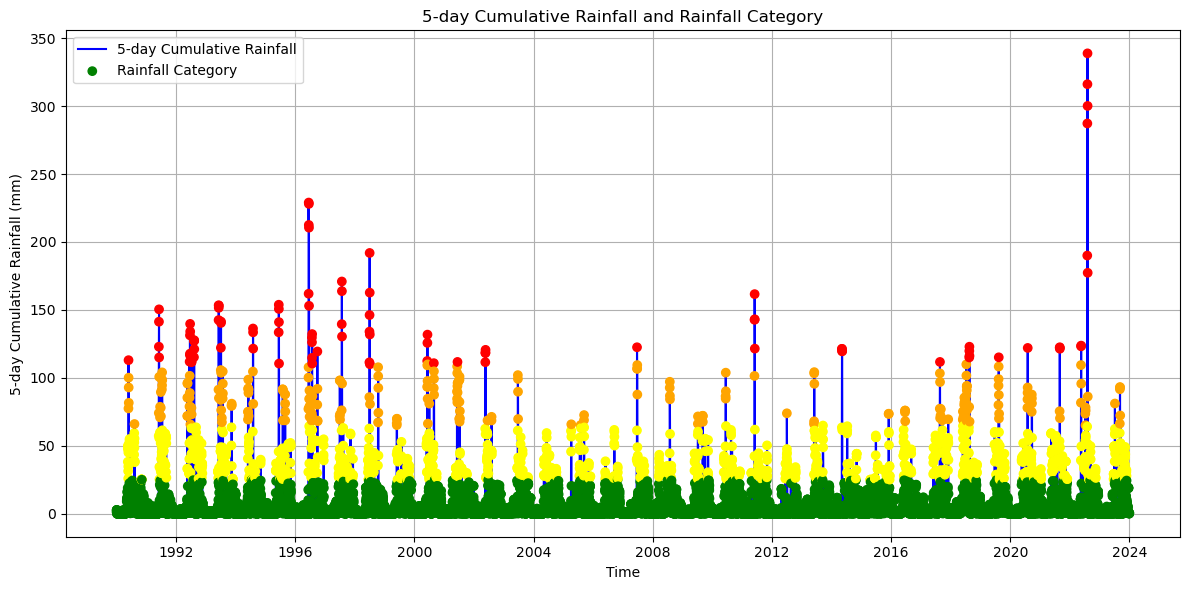

In [13]:
import matplotlib.pyplot as plt

# Plot the 5-day cumulative rainfall and rainfall category
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['5-day Cumulative Rainfall'], label='5-day Cumulative Rainfall', color='blue')
plt.scatter(df['Time'], df['5-day Cumulative Rainfall'], c=df['Rainfall Category'].map({'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}), label='Rainfall Category', zorder=5)
plt.xlabel('Time')
plt.ylabel('5-day Cumulative Rainfall (mm)')
plt.title('5-day Cumulative Rainfall and Rainfall Category')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10188\2016742799.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['5-day Cumulative Rainfall'] = df_2018['Precipitation Total sfc mm sum'].rolling(window=5, min_periods=1).sum()
C:\Users\user\AppData\Local\Temp\ipykernel_10188\2016742799.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Rainfall Category'] = pd.cut(df_2018['5-day Cumulative Rainfall'],


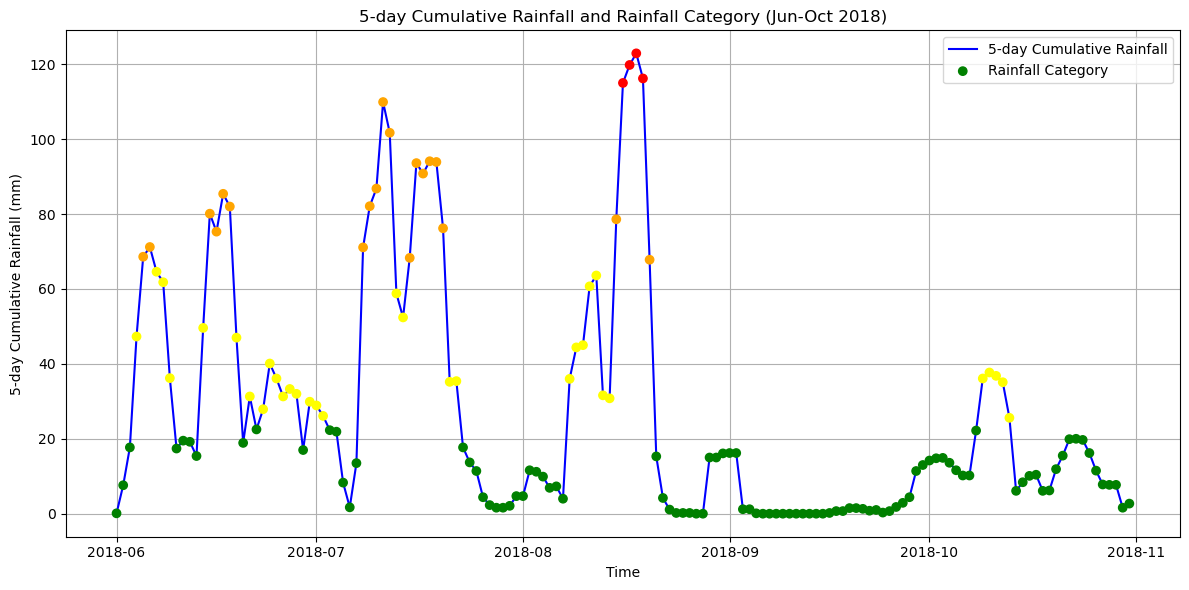

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'data.csv'
df = pd.read_csv('D:\\1990-2023.csv')

# Assuming 'Time' is the column containing the timestamps
# Parse the 'Time' column with the specified date format
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')

# Filter the DataFrame for June to October 2018
df_2018 = df[(df['Time'].dt.year == 2018) & (df['Time'].dt.month >= 6) & (df['Time'].dt.month <= 10)]

# Calculate the rolling 5-day cumulative rainfall
df_2018['5-day Cumulative Rainfall'] = df_2018['Precipitation Total sfc mm sum'].rolling(window=5, min_periods=1).sum()

# Define thresholds for rainfall categories (mm)
yellow_threshold = 25
orange_threshold = 65
red_threshold = 110

# Create a new column for rainfall category
df_2018['Rainfall Category'] = pd.cut(df_2018['5-day Cumulative Rainfall'], 
                                       bins=[-float('inf'), yellow_threshold, orange_threshold, red_threshold, float('inf')],
                                       labels=['Green', 'Yellow', 'Orange', 'Red'])

# Plot the 5-day cumulative rainfall and rainfall category
plt.figure(figsize=(12, 6))
plt.plot(df_2018['Time'], df_2018['5-day Cumulative Rainfall'], label='5-day Cumulative Rainfall', color='blue')
plt.scatter(df_2018['Time'], df_2018['5-day Cumulative Rainfall'], 
            c=df_2018['Rainfall Category'].map({'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}), 
            label='Rainfall Category', zorder=5)
plt.xlabel('Time')
plt.ylabel('5-day Cumulative Rainfall (mm)')
plt.title('5-day Cumulative Rainfall and Rainfall Category (Jun-Oct 2018)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Save the dataset with the rainfall category column
# Assuming your dataset is stored in a CSV file named 'data.csv'
df.to_csv('D:\\1990-2023_with_rainfall_category.csv', index=False)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'data.csv'
df = pd.read_csv('D:\\1990-2023_with_rainfall_category.csv')

# Prepare the data
X = df.drop(columns=['Rainfall Category', 'Time'])  # Features
y = df['Rainfall Category']  # Target variable

# Encode categorical variables (if any)
# If your features contain categorical variables, you may need to encode them

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model and train it
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       Green       1.00      1.00      1.00      2180
      Orange       0.89      0.81      0.85        63
         Red       1.00      0.42      0.59        12
      Yellow       0.95      1.00      0.97       229

    accuracy                           0.99      2484
   macro avg       0.96      0.81      0.85      2484
weighted avg       0.99      0.99      0.99      2484

Confusion Matrix:
[[2180    0    0    0]
 [   0   51    0   12]
 [   0    6    5    1]
 [   1    0    0  228]]


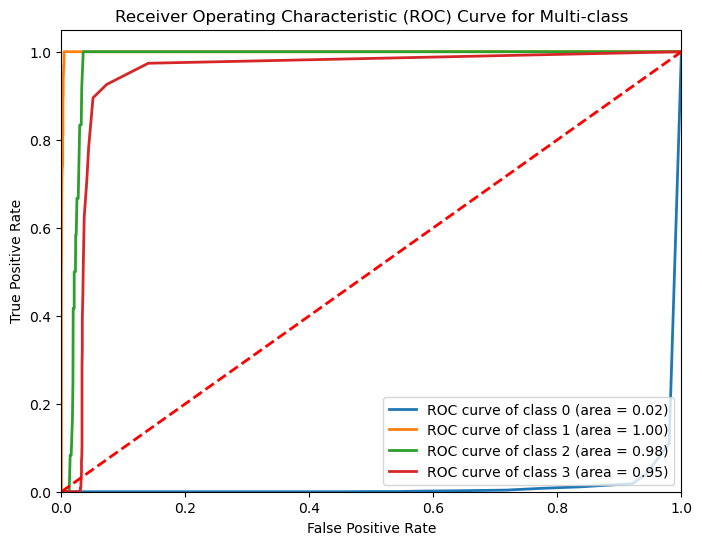

In [5]:
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=model.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

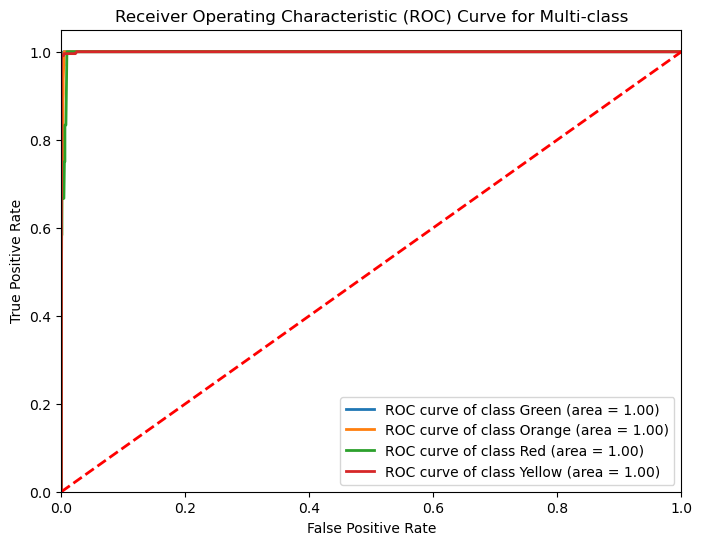

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=model.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Get class labels
class_labels = model.classes_

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {} (area = {:.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
# Assuming your dataset is stored in a CSV file named '1990-2023_with_rainfall_category.csv'
df = pd.read_csv('D:\\1990-2023_with_rainfall_category.csv')

# Assuming 'Time' is the column containing the timestamps
# Parse the 'Time' column with the specified date format
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d')

# Filter the DataFrame for June to October
df_filtered = df[(df['Time'].dt.month >= 6) & (df['Time'].dt.month <= 10)]

# Prepare the data
X = df_filtered.drop(columns=['Rainfall Category', 'Time'])  # Features
y = df_filtered['Rainfall Category']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)



y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classifier Model:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Model:
              precision    recall  f1-score   support

       Green       1.00      1.00      1.00       792
      Orange       1.00      1.00      1.00        46
         Red       1.00      1.00      1.00        20
      Yellow       1.00      1.00      1.00       183

    accuracy                           1.00      1041
   macro avg       1.00      1.00      1.00      1041
weighted avg       1.00      1.00      1.00      1041

Confusion Matrix:
[[792   0   0   0]
 [  0  46   0   0]
 [  0   0  20   0]
 [  0   0   0 183]]


C:\Users\user\AppData\Local\Temp\ipykernel_18128\195307242.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['5-day Cumulative Rainfall'] = df_2019['Precipitation Total sfc mm sum'].rolling(window=5, min_periods=1).sum()
C:\Users\user\AppData\Local\Temp\ipykernel_18128\195307242.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Rainfall Category'] = pd.cut(df_2019['5-day Cumulative Rainfall'],


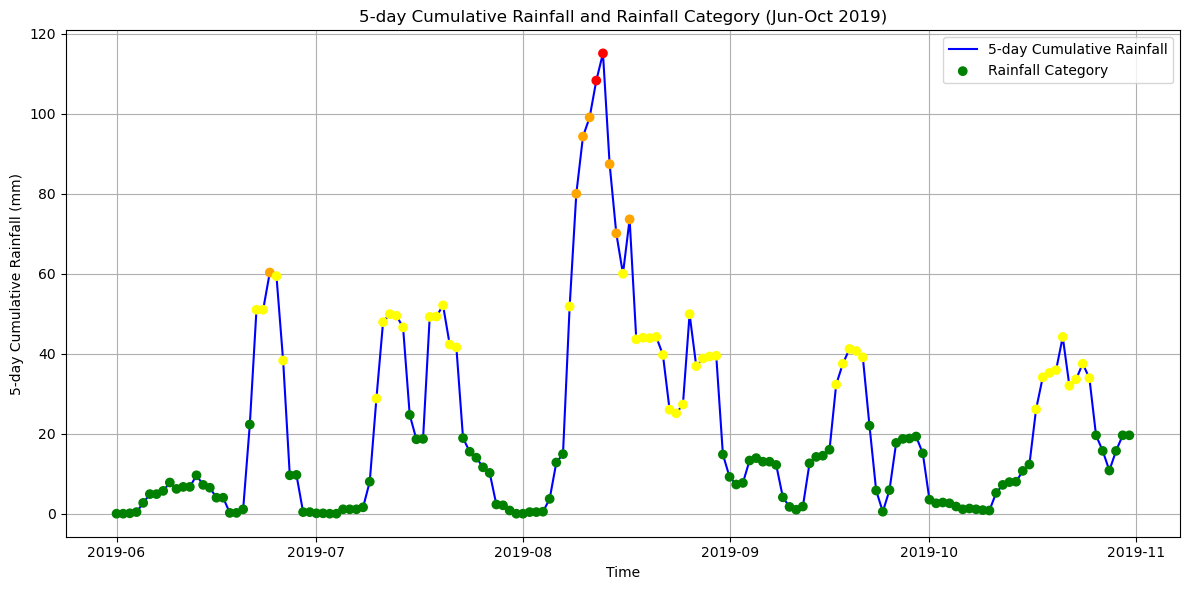

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'data.csv'
df = pd.read_csv('D:\\1990-2023.csv')

# Assuming 'Time' is the column containing the timestamps
# Parse the 'Time' column with the specified date format
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')

# Filter the DataFrame for June to October 2018
df_2019 = df[(df['Time'].dt.year == 2019) & (df['Time'].dt.month >= 6) & (df['Time'].dt.month <= 10)]

# Calculate the rolling 5-day cumulative rainfall
df_2019['5-day Cumulative Rainfall'] = df_2019['Precipitation Total sfc mm sum'].rolling(window=5, min_periods=1).sum()

# Define thresholds for rainfall categories (mm)
yellow_threshold = 25
orange_threshold = 60
red_threshold = 100

# Create a new column for rainfall category
df_2019['Rainfall Category'] = pd.cut(df_2019['5-day Cumulative Rainfall'], 
                                       bins=[-float('inf'), yellow_threshold, orange_threshold, red_threshold, float('inf')],
                                       labels=['Green', 'Yellow', 'Orange', 'Red'])

# Plot the 5-day cumulative rainfall and rainfall category
plt.figure(figsize=(12, 6))
plt.plot(df_2019['Time'], df_2019['5-day Cumulative Rainfall'], label='5-day Cumulative Rainfall', color='blue')
plt.scatter(df_2019['Time'], df_2019['5-day Cumulative Rainfall'], 
            c=df_2019['Rainfall Category'].map({'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}), 
            label='Rainfall Category', zorder=4)
plt.xlabel('Time')
plt.ylabel('5-day Cumulative Rainfall (mm)')
plt.title('5-day Cumulative Rainfall and Rainfall Category (Jun-Oct 2019)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

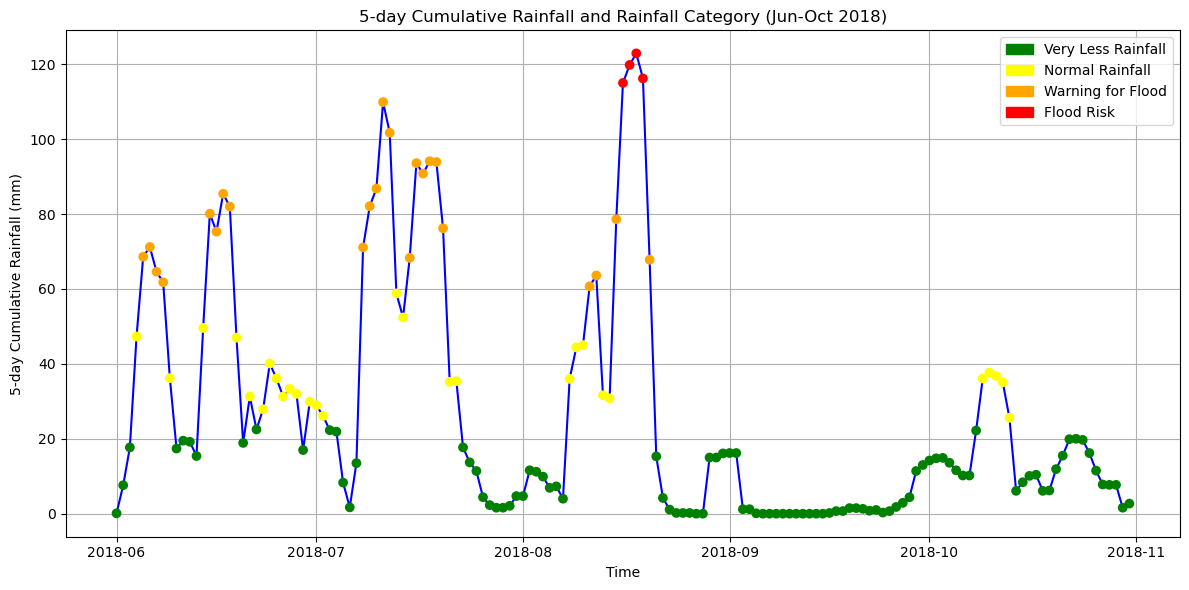

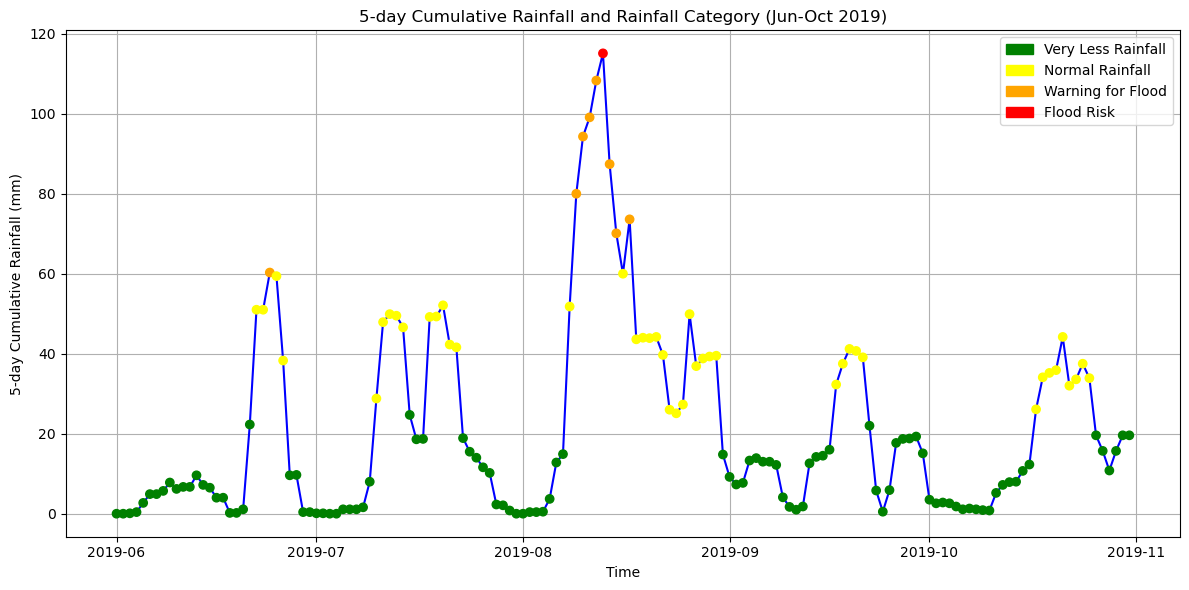

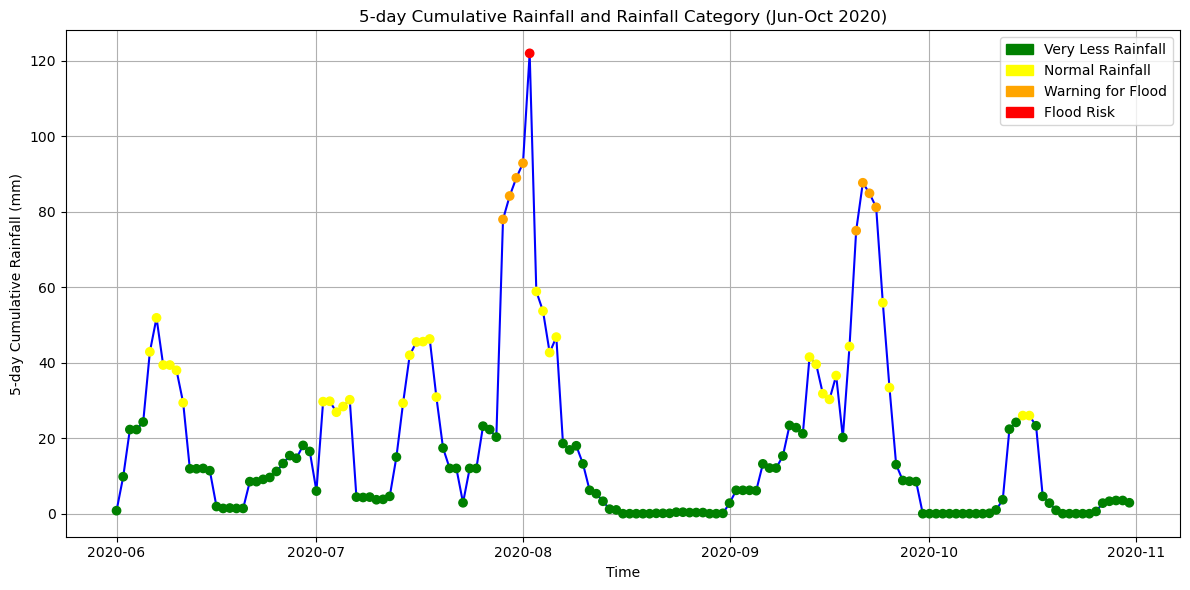

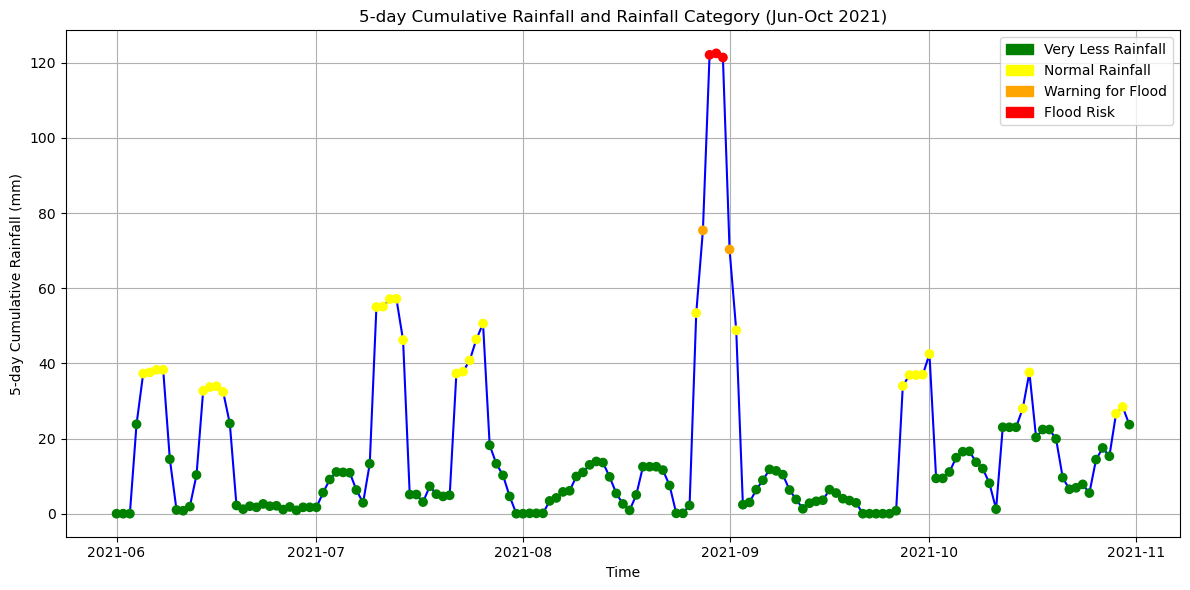

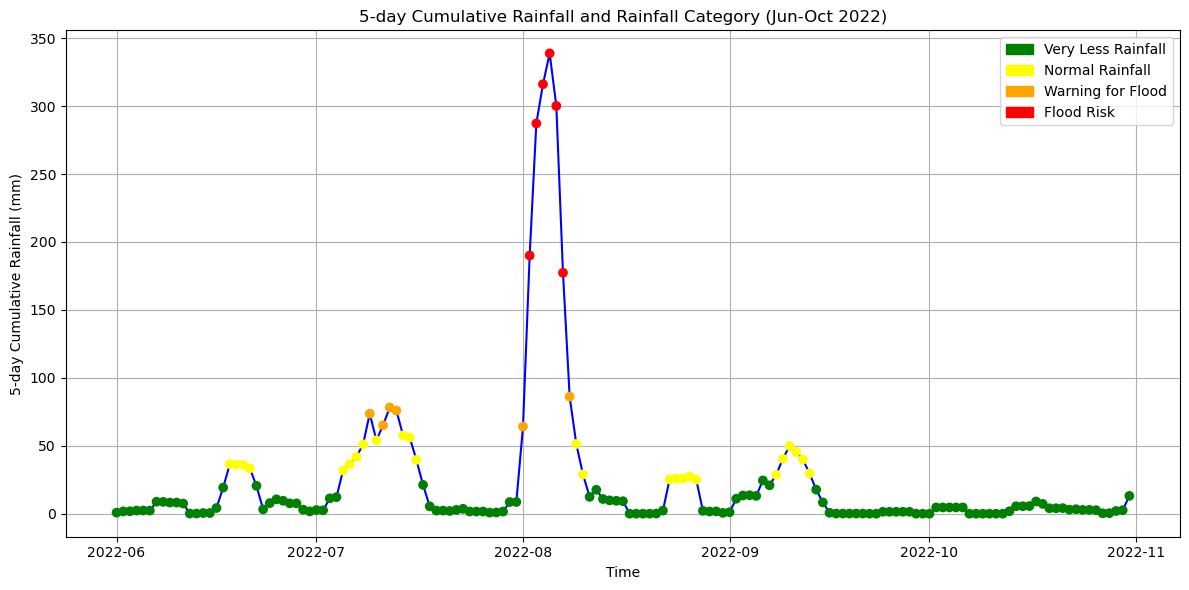

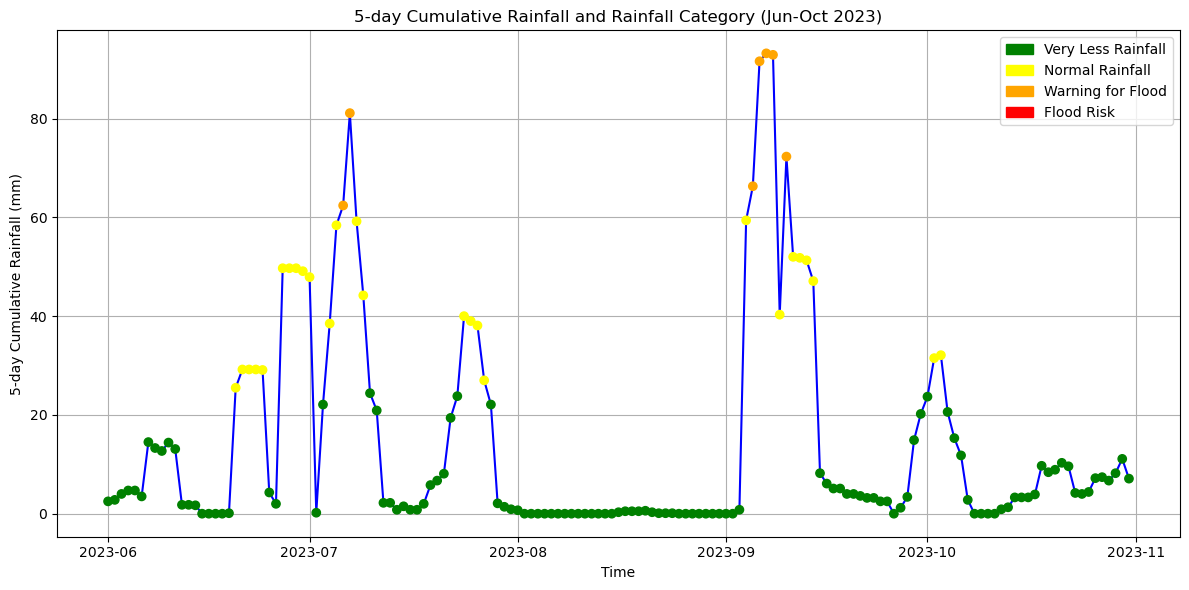

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'data.csv'
df = pd.read_csv('D:\\1990-2023.csv')

# Assuming 'Time' is the column containing the timestamps
# Parse the 'Time' column with the specified date format
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')

# Define a function to create the plot for a specific year
def plot_year(year):
    # Filter the DataFrame for June to October of the specified year
    df_year = df[(df['Time'].dt.year == year) & (df['Time'].dt.month >= 6) & (df['Time'].dt.month <= 10)].copy()

    # Calculate the rolling 5-day cumulative rainfall
    df_year['5-day Cumulative Rainfall'] = df_year['Precipitation Total sfc mm sum'].rolling(window=5, min_periods=1).sum()

    # Define thresholds for rainfall categories (mm)
    yellow_threshold = 25
    orange_threshold = 60
    red_threshold = 110

    # Create a new column for rainfall category
    df_year['Rainfall Category'] = pd.cut(df_year['5-day Cumulative Rainfall'], 
                                           bins=[-float('inf'), yellow_threshold, orange_threshold, red_threshold, float('inf')],
                                           labels=['Green', 'Yellow', 'Orange', 'Red'])

    # Plot the 5-day cumulative rainfall and rainfall category
    plt.figure(figsize=(12, 6))
    plt.plot(df_year['Time'], df_year['5-day Cumulative Rainfall'], label='5-day Cumulative Rainfall', color='blue')

    # Define custom legend patches with specific colors and labels
    legend_patches = [
        mpatches.Patch(color='green', label='Very Less Rainfall'),
        mpatches.Patch(color='yellow', label='Normal Rainfall'),
        mpatches.Patch(color='orange', label='Warning for Flood'),
        mpatches.Patch(color='red', label='Flood Risk')
    ]

    # Add legend with custom legend patches
    plt.legend(handles=legend_patches)

    # Scatter plot for rainfall category with custom colors
    plt.scatter(df_year['Time'], df_year['5-day Cumulative Rainfall'], 
                c=df_year['Rainfall Category'].map({'Green': 'green', 'Yellow': 'yellow', 'Orange': 'orange', 'Red': 'red'}), 
                label='Rainfall Category', zorder=5)

    plt.xlabel('Time')
    plt.ylabel('5-day Cumulative Rainfall (mm)')
    plt.title(f'5-day Cumulative Rainfall and Rainfall Category (Jun-Oct {year})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function for each year
plot_year(2018)
plot_year(2019)
plot_year(2020)
plot_year(2021)
plot_year(2022)
plot_year(2023)

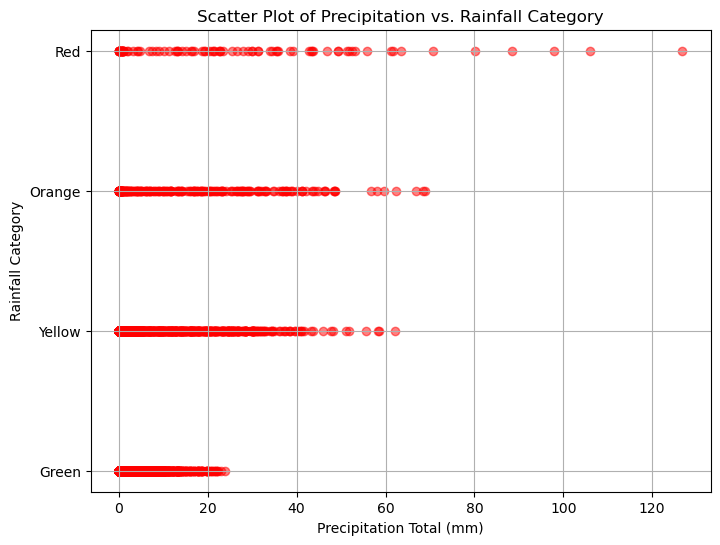

In [8]:
# Plot scatter plot of precipitation vs. flood occurrences
plt.figure(figsize=(8, 6))
plt.scatter(df['Precipitation Total sfc mm sum'], df['Rainfall Category'], color='red', alpha=0.5)
plt.xlabel('Precipitation Total (mm)')
plt.ylabel('Rainfall Category')
plt.title('Scatter Plot of Precipitation vs. Rainfall Category')
plt.grid(True)
plt.show()

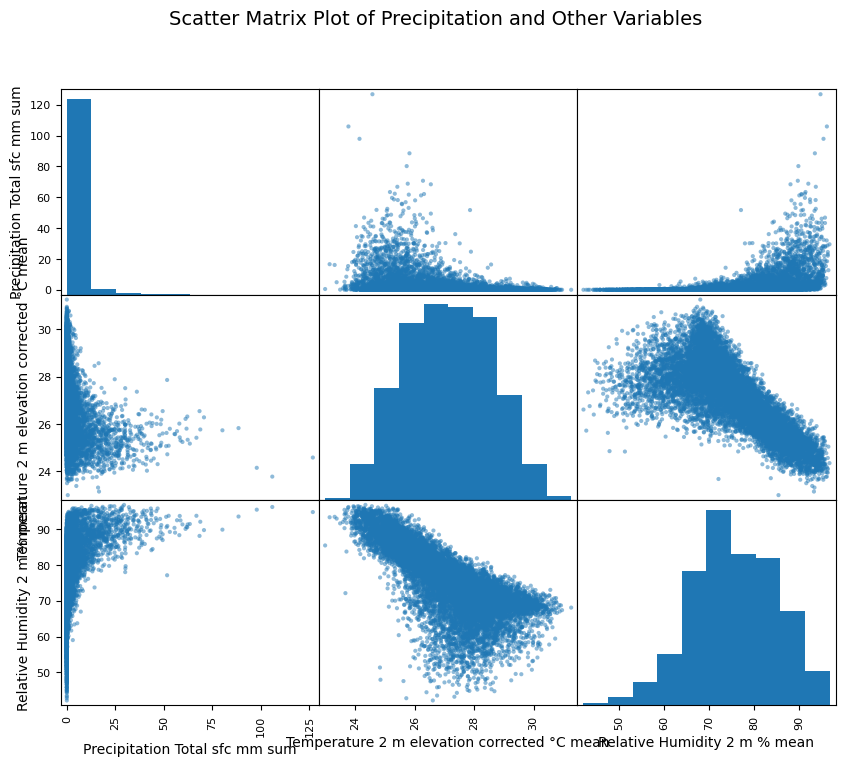

In [9]:
from pandas.plotting import scatter_matrix

# Select variables of interest
variables_of_interest = ['Precipitation Total sfc mm sum', 'Temperature 2 m elevation corrected °C mean', 'Relative Humidity 2 m % mean']

# Create scatter matrix plot
scatter_matrix(df[variables_of_interest], figsize=(10, 8))
plt.suptitle('Scatter Matrix Plot of Precipitation and Other Variables', fontsize=14)
plt.show()